<a href="https://colab.research.google.com/github/qawnaoya/ColabAzureTextAnalytics/blob/main/TextAnalytics001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install azure-ai-textanalytics --pre

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import configparser
from azure.core.credentials import AzureKeyCredential
from azure.ai.textanalytics import TextAnalyticsClient
import seaborn as sns
import pandas as pd

In [4]:
sns.set_style('white')

In [5]:
config = configparser.ConfigParser()
config.read('/content/drive/MyDrive/Keys/azure.config')

['/content/drive/MyDrive/Keys/azure.config']

In [6]:
endpoint = config['AZURE']['azure_endpoint']
key = config['AZURE']['azure_ai_key']

In [7]:
client = TextAnalyticsClient(endpoint=endpoint, credential=AzureKeyCredential(key))

In [8]:
documents = [
    {
      "id": 1,
      "language": "ja",
      "text": "iPhoneのマップやばいよ"
    }
]

In [9]:
result = client.analyze_sentiment(documents)
docs = [doc for doc in result if not doc.is_error]

In [10]:
doc = docs[0]

In [11]:
confidience_scores = {key:value for key, value in doc.confidence_scores.items()}

In [12]:
sentiment = pd.Series(confidience_scores)

In [13]:
sentiment

positive    0.19
neutral     0.66
negative    0.15
dtype: float64

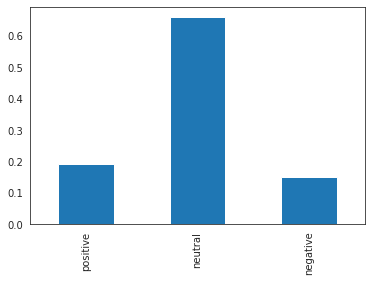

In [14]:
sentiment.plot.bar()